In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 


In [4]:
#importing the full image

full = cv2.imread('sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

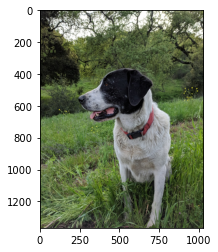

In [5]:
plt.imshow(full)

In [7]:
#importing the template image

face = cv2.imread('sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

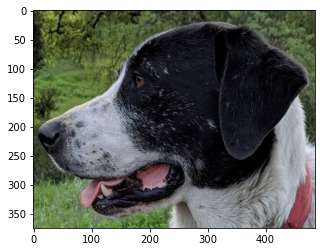

In [8]:
plt.imshow(face)

In [9]:
#TEMPLATE MATCHING 

In [10]:
height, width, channels = face.shape

In [11]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

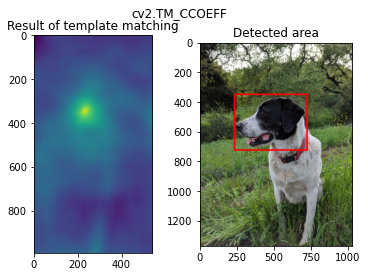

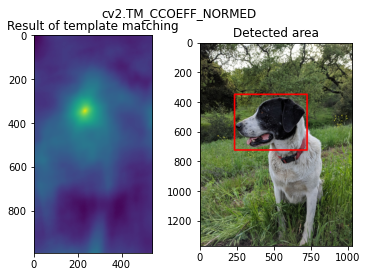

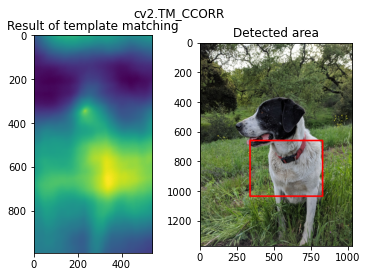

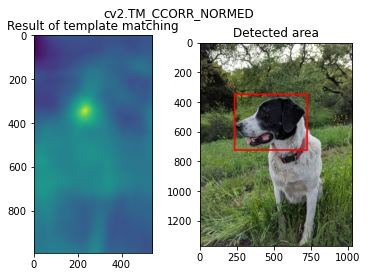

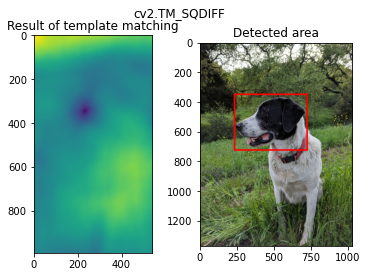

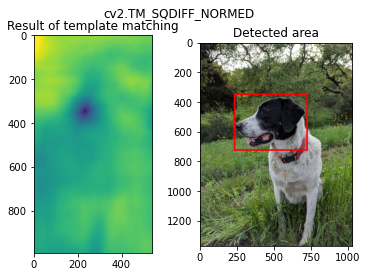

In [13]:
#function to match 

for m in methods:
    
    full_copy = full.copy()
    
    method = eval(m)
    
    res = cv2.matchTemplate(full_copy, face, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]: 
        top_left = min_loc
    else:
        top_left = max_loc
        
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, 255, 10)
    
    ##plotting
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of template matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected area')
    plt.suptitle(m)
    
    plt.show()
    
    print('\n')
    print('\n')
    